# Does dorm matter for well-being?

A: Probably not.

We fit a range of models to predict student's t2 (fall) well-being (measured in week 4 of the semester).

Life satisfaction:

Overall, their reported life satisfaction at t1 (measured in week 0, before the semester began) explained most of the variance in t2 life satisfaction (approx 55%), with trace amounts of additional variance explainable by additional variables (approx 3% more). The few variables that remained significant contributors to the model, above and beyond t1 life satisfaction, were: stress at t1, loneliness at t1, and number of network nominations (in and out) at t2. All were in the intuitive directions but very small in size. No traits of the person's network were significant.

Mixed-effects models showed that *none* of the residual variance in life satisfaction could be attributed to membership in particular dorms.

Loneliness:

Similar results to above, only t1 loneliness could only explain some 26% of t2 loneliness. However, additional variables still only explained about 3% more of the variance.

Stress:

A bit better. t1 stress can explain some 21% of variance in t2 stress, but additional predictors can explain another 7%. The in and out degrees didn't seem to matter, amazingly, but being female was associated with higher stress, as was high neuroticism (which is associated with being female). Dorm and network variables were still non-significant.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Configuration" data-toc-modified-id="Configuration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Configuration</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Cleaning---drop-rows-we-don't-want" data-toc-modified-id="Cleaning---drop-rows-we-don't-want-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cleaning - drop rows we don't want</a></span><ul class="toc-item"><li><span><a href="#Drop-people-who-made-no-network-nominations" data-toc-modified-id="Drop-people-who-made-no-network-nominations-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Drop people who made no network nominations</a></span></li><li><span><a href="#Drop-people-with-fewer-than-3-network-connections-(in-or-out)-as-we-don't-trust-the-averages-of-their-network's-traits" data-toc-modified-id="Drop-people-with-fewer-than-3-network-connections-(in-or-out)-as-we-don't-trust-the-averages-of-their-network's-traits-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Drop people with fewer than 3 network connections (in or out) as we don't trust the averages of their network's traits</a></span></li><li><span><a href="#Drop-the-rows-with-missing-values-(~20%)" data-toc-modified-id="Drop-the-rows-with-missing-values-(~20%)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Drop the rows with missing values (~20%)</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Base-models---predict-well-being-at-t1-from-well-being-at-t1" data-toc-modified-id="Base-models---predict-well-being-at-t1-from-well-being-at-t1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Base models - predict well-being at t1 from well-being at t1</a></span></li><li><span><a href="#Fixed-effects-models:-predict-WB-at-t2-from-WB-and-other-personal-factors-at-t1" data-toc-modified-id="Fixed-effects-models:-predict-WB-at-t2-from-WB-and-other-personal-factors-at-t1-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Fixed-effects models: predict WB at t2 from WB and other personal factors at t1</a></span></li><li><span><a href="#Lets-reduce-our-fixed-effects-model-to-only-wellbeing-and-in/out-degree-measures" data-toc-modified-id="Lets-reduce-our-fixed-effects-model-to-only-wellbeing-and-in/out-degree-measures-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Lets reduce our fixed effects model to only wellbeing and in/out degree measures</a></span></li><li><span><a href="#Examine-residuals-by-dorm.-If-there-is-a-sigificant-dorm-wide-effect,-we-should-see-some-clear-boxes-that-are-above-and-below-zero.-(Spoiler-alert:-we-don't)" data-toc-modified-id="Examine-residuals-by-dorm.-If-there-is-a-sigificant-dorm-wide-effect,-we-should-see-some-clear-boxes-that-are-above-and-below-zero.-(Spoiler-alert:-we-don't)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Examine residuals by dorm. If there is a sigificant dorm-wide effect, we should see some clear boxes that are above and below zero. (Spoiler alert: we don't)</a></span></li></ul></li><li><span><a href="#Add-random-effect-for-dorm,-see-if-significant-variance-is-attributable-to-dorm-membership" data-toc-modified-id="Add-random-effect-for-dorm,-see-if-significant-variance-is-attributable-to-dorm-membership-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Add random effect for dorm, see if significant variance is attributable to dorm membership</a></span><ul class="toc-item"><li><span><a href="#Try-again,-with-some-dorm-level-covariates" data-toc-modified-id="Try-again,-with-some-dorm-level-covariates-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Try again, with some dorm-level covariates</a></span></li></ul></li><li><span><a href="#Fixed-effects-model,-including-network-features-(average-traits-of-people-connected-to-the-individual-via-nominations)" data-toc-modified-id="Fixed-effects-model,-including-network-features-(average-traits-of-people-connected-to-the-individual-via-nominations)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fixed effects model, including network features (average traits of people connected to the individual via nominations)</a></span></li></ul></div>

## Configuration

In [1]:
DV = 'life_satisfaction'
# DV = 'stress'
# DV = 'loneliness'

DV_t1 = paste(DV, 't1', sep='_')
DV_t2 = paste(DV, 't2', sep='_')
c(DV, DV_t1, DV_t2)

[1] "life_satisfaction"    "life_satisfaction_t1" "life_satisfaction_t2"

## Libraries

In [2]:
library(car)
library(tidyverse)
library(mice)
library(nlme)
library(lme4)
library(lmerTest)

Loading required package: carData

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ purrr::some()   masks car::some()

Loading required package: lattice

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 


Attaching package: ‘mice’


The following object is masked from ‘package:tidyr’:

    complete


The following objects are masked from ‘package:base’:

    cbind, rbind



Attaching package: ‘nlme’


The following object is mask

In [3]:
df = read.csv('../data/2019–2020/postprocessed/df_full_train.csv', na.strings=c(""," "))
dim(df)
head(df)

[1] 560  57

,PID,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,⋯,network_BFI_A,network_BFI_O,network_BFI_N,network_BFI_C,network_intl_student,network_family_income,network_life_satisfaction_t2,network_loneliness_t2,network_stress_t2,network_n_networkmates
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,⋯,4.750000,5.75,4.500000,5.000000,0.0000000,175000.00,5.750000,2.333333,1.75,2
2,1047,female,other_or_mixed,Twain,5.333333,6.500,2.000000,2.5,5.5,6.5,⋯,5.416667,5.50,2.833333,5.166667,0.1666667,91666.67,4.833333,1.444444,2.25,6
3,1078,female,east_asian,Loro,5.500000,6.250,1.333333,2.0,4.5,6.5,⋯,5.500000,3.50,1.500000,4.000000,0.0000000,90000.00,4.666667,1.000000,1.50,1
4,1097,male,east_asian,Otero,6.000000,5.000,2.000000,2.0,3.0,4.0,⋯,5.400000,5.10,3.100000,5.700000,0.0000000,130000.00,4.866667,2.133333,2.20,5
5,1105,female,white,Larkin,6.666667,5.750,2.000000,2.0,4.5,5.0,⋯,4.350000,5.65,3.750000,5.550000,0.2000000,161000.00,5.133333,1.966667,2.20,10
6,1110,female,white,Larkin,5.166667,6.750,2.000000,2.0,6.5,5.0,⋯,5.250000,5.00,2.625000,5.750000,0.0000000,152500.00,5.750000,1.666667,2.00,4


In [4]:
str(df)

'data.frame':	560 obs. of  57 variables:
 $ PID                         : int  1001 1047 1078 1097 1105 1110 1128 1132 1134 1162 ...
 $ gender                      : Factor w/ 3 levels "female","male",..: 2 1 1 2 1 1 1 1 2 1 ...
 $ race                        : Factor w/ 6 levels "black","east_asian",..: 5 4 2 2 6 6 6 NA 3 2 ...
 $ dorm                        : Factor w/ 21 levels "Alondra","Arroyo",..: 16 19 11 15 10 10 7 15 2 3 ...
 $ life_satisfaction_t1        : num  4.83 5.33 5.5 6 6.67 ...
 $ empathy                     : num  6.38 6.5 6.25 5 5.75 ...
 $ loneliness_t1               : num  1.33 2 1.33 2 2 ...
 $ stress_t1                   : num  2.5 2.5 2 2 2 2 1.5 2 1.5 1 ...
 $ BFI_E                       : num  6.5 5.5 4.5 3 4.5 6.5 5 7 5.5 3.5 ...
 $ BFI_A                       : num  6 6.5 6.5 4 5 5 5 5 5 6.5 ...
 $ BFI_O                       : num  6.5 6.5 6.5 4.5 4.5 4.5 5.5 5.5 6 7 ...
 $ BFI_N                       : num  3.5 3 1.5 1.5 2 2 2 2.5 1.5 3 ...
 $ BFI_C      

## Cleaning - drop rows we don't want

### Drop people who made no network nominations

In [5]:
print(dim(df))
df = df[df$edges_out != 0,]
print(dim(df))

[1] 560  57
[1] 542  57


### Drop people with fewer than 3 network connections (in or out) as we don't trust the averages of their network's traits

In [6]:
table(df$edges_unique)


 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 25 26 29 
 3  3  9 15 23 44 46 54 58 43 43 39 31 29 25 16 17 14  7  7  4  2  4  3  1  1 
36 
 1 

In [7]:
print(dim(df))
df = df[df$edges_unique >= 3,]
print(dim(df))

[1] 542  57
[1] 536  57


### Drop the rows with missing values (~20%)

,PID,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_O,BFI_N,⋯,network_BFI_O,network_BFI_N,network_BFI_C,network_intl_student,network_family_income,network_life_satisfaction_t2,network_loneliness_t2,network_stress_t2,race,
435,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,0
49,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,0,1
6,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,1,14
1,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,15
11,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,0,2
1,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,16
11,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,1,15
2,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,16
9,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1


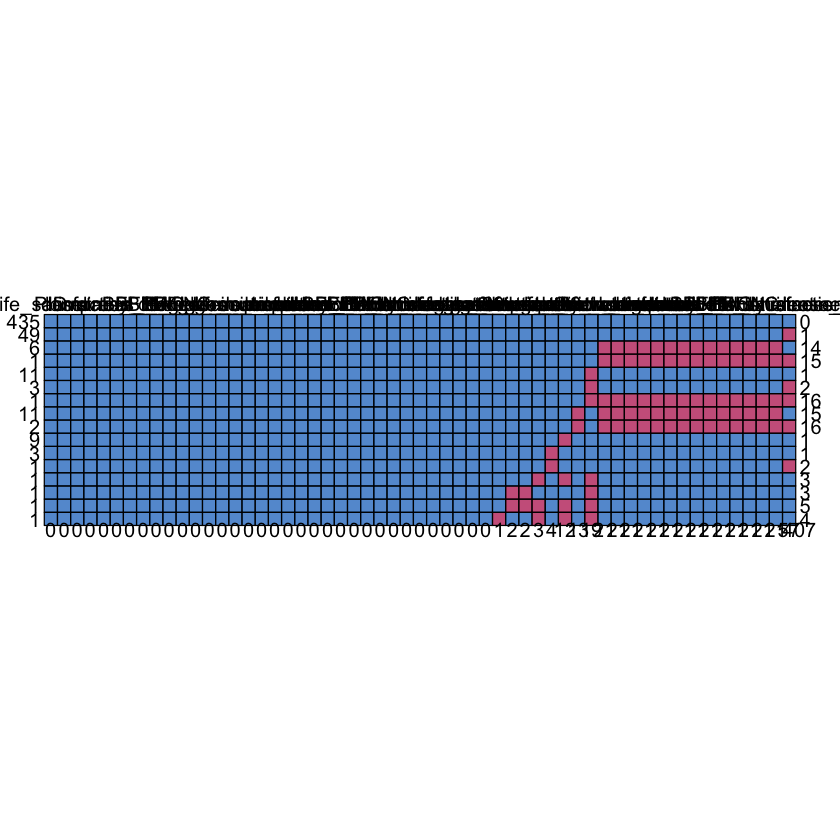

In [8]:
md.pattern(df)

In [9]:
# imputed <- mice(df, m=1)
# df = complete(imputed)
# sum(is.na(df))

In [10]:
dim(df)
df = df[complete.cases(df), ]
dim(df)

[1] 536  57

[1] 435  57

## Model

In [11]:
head(df)

,PID,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,⋯,network_BFI_A,network_BFI_O,network_BFI_N,network_BFI_C,network_intl_student,network_family_income,network_life_satisfaction_t2,network_loneliness_t2,network_stress_t2,network_n_networkmates
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,⋯,4.750000,5.75,4.500000,5.000000,0.0000000,175000.00,5.750000,2.333333,1.75,2
2,1047,female,other_or_mixed,Twain,5.333333,6.500,2.000000,2.5,5.5,6.5,⋯,5.416667,5.50,2.833333,5.166667,0.1666667,91666.67,4.833333,1.444444,2.25,6
3,1078,female,east_asian,Loro,5.500000,6.250,1.333333,2.0,4.5,6.5,⋯,5.500000,3.50,1.500000,4.000000,0.0000000,90000.00,4.666667,1.000000,1.50,1
4,1097,male,east_asian,Otero,6.000000,5.000,2.000000,2.0,3.0,4.0,⋯,5.400000,5.10,3.100000,5.700000,0.0000000,130000.00,4.866667,2.133333,2.20,5
5,1105,female,white,Larkin,6.666667,5.750,2.000000,2.0,4.5,5.0,⋯,4.350000,5.65,3.750000,5.550000,0.2000000,161000.00,5.133333,1.966667,2.20,10
6,1110,female,white,Larkin,5.166667,6.750,2.000000,2.0,6.5,5.0,⋯,5.250000,5.00,2.625000,5.750000,0.0000000,152500.00,5.750000,1.666667,2.00,4


### Base models - predict well-being at t1 from well-being at t1

In [12]:
base_model_one_predictor = lm(as.formula(paste(DV_t2, '~', DV_t1)), df)
summary(base_model_one_predictor)


Call:
lm(formula = as.formula(paste(DV_t2, "~", DV_t1)), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0002 -0.4718  0.0533  0.5375  3.3742 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.00299    0.17445   5.749 1.69e-08 ***
life_satisfaction_t1  0.77366    0.03379  22.894  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.809 on 433 degrees of freedom
Multiple R-squared:  0.5476,	Adjusted R-squared:  0.5466 
F-statistic: 524.1 on 1 and 433 DF,  p-value: < 2.2e-16


In [13]:
base_model <- lm(as.formula(paste(DV_t2, '~', 'life_satisfaction_t1 + loneliness_t1 + stress_t1')), df)
summary(base_model)
Anova(base_model)


Call:
lm(formula = as.formula(paste(DV_t2, "~", "life_satisfaction_t1 + loneliness_t1 + stress_t1")), 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0923 -0.4669  0.0314  0.5248  3.2511 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.04743    0.36194   5.657 2.81e-08 ***
life_satisfaction_t1  0.70690    0.03959  17.854  < 2e-16 ***
loneliness_t1        -0.13840    0.08318  -1.664  0.09686 .  
stress_t1            -0.22047    0.07836  -2.814  0.00512 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8003 on 431 degrees of freedom
Multiple R-squared:  0.5594,	Adjusted R-squared:  0.5563 
F-statistic: 182.4 on 3 and 431 DF,  p-value: < 2.2e-16


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
life_satisfaction_t1,204.139116,1,318.759291,8.974803e-54
loneliness_t1,1.772982,1,2.768477,9.686447e-02
stress_t1,5.069685,1,7.916216,5.123526e-03
Residuals,276.020061,431,NA,NA


In [14]:
anova(base_model_one_predictor, base_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,433,283.4085,NA,NA,NA,NA
2,431,276.0201,2,7.388423,5.76844,0.003370861


In [15]:
r1 = summary(base_model_one_predictor)$adj.r.squared
r2 = summary(base_model)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.546560294021305"
[1] "After: 0.556332135805455"
[1] "Partial r² (adjusted): 0.0215504766241395"


### Fixed-effects models: predict WB at t2 from WB and other personal factors at t1

In [16]:
fixed_params = "
life_satisfaction_t1 + loneliness_t1 + stress_t1 +
edges_in + edges_out +
C(gender) + C(race) + empathy +
BFI_E + BFI_O + BFI_C + BFI_A + BFI_N +
intl_student + parent_education_highest + log10(family_income)"

In [17]:
fixed_model = lm(as.formula(paste(DV_t2, '~', fixed_params)), df)
summary(fixed_model)


Call:
lm(formula = as.formula(paste(DV_t2, "~", fixed_params)), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.68434 -0.44552  0.05092  0.48370  3.02338 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                 0.728050   0.823591   0.884
life_satisfaction_t1                        0.668174   0.043448  15.379
loneliness_t1                              -0.126594   0.089481  -1.415
stress_t1                                  -0.180908   0.094305  -1.918
edges_in                                    0.032567   0.014901   2.186
edges_out                                   0.017490   0.009535   1.834
C(gender)male                              -0.049251   0.086574  -0.569
C(gender)other                              0.212602   0.585161   0.363
C(race)east_asian                           0.192260   0.139363   1.380
C(race)hispanic                             0.217326   0.155477   1.398
C(race)other_

In [18]:
anova(base_model, fixed_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,431,276.0201,NA,NA,NA,NA
2,409,257.0937,22,18.92632,1.368596,0.1245384


In [19]:
r1 = summary(base_model)$adj.r.squared
r2 = summary(fixed_model)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.556332135805455"
[1] "After: 0.56452543483313"
[1] "Partial r² (adjusted): 0.0184671906371889"


### Lets reduce our fixed effects model to only wellbeing and in/out degree measures

In [20]:
fixed_model_inout = lm(as.formula(paste(DV_t2, "~ life_satisfaction_t1 + stress_t1 +
                                                loneliness_t1 + edges_in + edges_out")), df)
summary(fixed_model_inout)


Call:
lm(formula = as.formula(paste(DV_t2, "~ life_satisfaction_t1 + stress_t1 +\n                                                loneliness_t1 + edges_in + edges_out")), 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0112 -0.4485  0.0242  0.5022  3.1195 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.720482   0.371432   4.632 4.81e-06 ***
life_satisfaction_t1  0.704021   0.039270  17.928  < 2e-16 ***
stress_t1            -0.212245   0.077713  -2.731  0.00657 ** 
loneliness_t1        -0.121572   0.082731  -1.469  0.14243    
edges_in              0.028093   0.013993   2.008  0.04530 *  
edges_out             0.018648   0.009413   1.981  0.04822 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7919 on 429 degrees of freedom
Multiple R-squared:  0.5705,	Adjusted R-squared:  0.5655 
F-statistic:   114 on 5 and 429 DF,  p-value: < 2.2e-16


In [21]:
anova(base_model, fixed_model_inout)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,431,276.0201,NA,NA,NA,NA
2,429,269.0489,2,6.971154,5.557772,0.004140288


In [22]:
r1 = summary(base_model)$adj.r.squared
r2 = summary(fixed_model_inout)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.556332135805455"
[1] "After: 0.565521254253014"
[1] "Partial r² (adjusted): 0.0207117061864302"


### Examine residuals by dorm. If there is a sigificant dorm-wide effect, we should see some clear boxes that are above and below zero. (Spoiler alert: we don't)

In [23]:
df$residuals = fixed_model$residuals

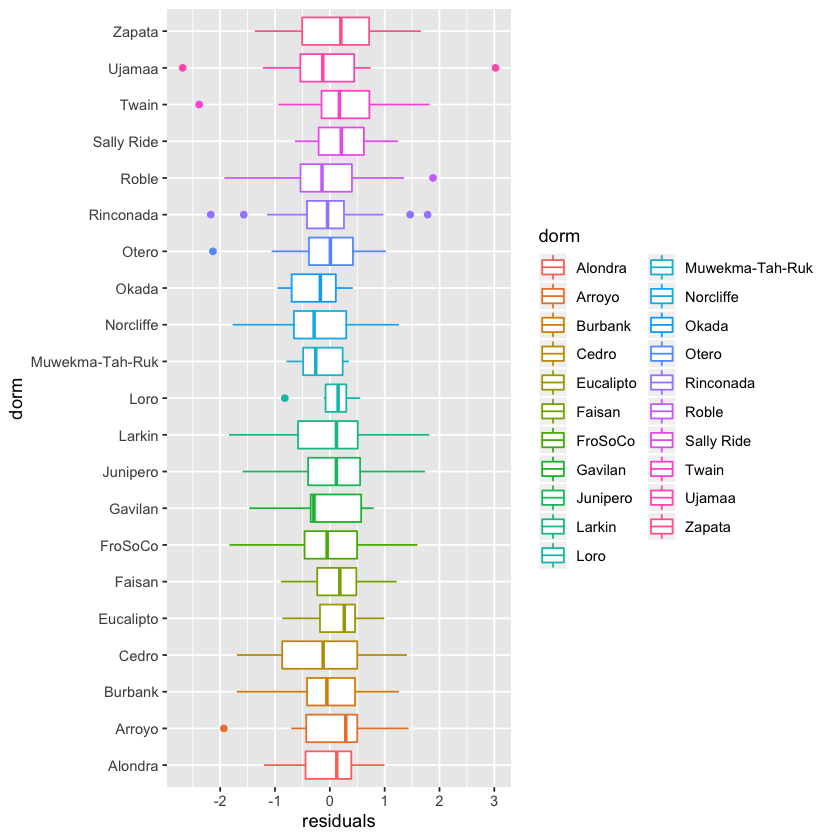

In [24]:
ggplot(data=df, mapping=aes(dorm, residuals)) + 
  geom_boxplot(aes(color=dorm)) + coord_flip()

## Add random effect for dorm, see if significant variance is attributable to dorm membership

In [25]:
mixed_model = lmer(as.formula(paste(DV_t2, '~', fixed_params, "+ (1|dorm)")), df)
summary(mixed_model)

boundary (singular) fit: see ?isSingular


Correlation matrix not shown by default, as p = 26 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: as.formula(paste(DV_t2, "~", fixed_params, "+ (1|dorm)"))
   Data: df

REML criterion at convergence: 1094.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3857 -0.5619  0.0642  0.6101  3.8134 

Random effects:
 Groups   Name        Variance Std.Dev.
 dorm     (Intercept) 0.0000   0.0000  
 Residual             0.6286   0.7928  
Number of obs: 435, groups:  dorm, 21

Fixed effects:
                                             Estimate Std. Error         df
(Intercept)                                  0.728050   0.823591 409.000000
life_satisfaction_t1                         0.668174   0.043448 409.000000
loneliness_t1                               -0.126594   0.089481 409.000000
stress_t1                                   -0.180908   0.094305 409.000000
edges_in                                     0.032567   0.014901 409.000000
edges_out                                    0.

### Try again, with some dorm-level covariates

In [26]:
mixed_model_with_l2_covariates = lmer(as.formula(paste(
    DV_t2, '~', fixed_params,
    "+ (1 + dorm_BFI_E + dorm_life_satisfaction_t1|dorm)")),
    df)
summary(mixed_model_with_l2_covariates)

boundary (singular) fit: see ?isSingular


Correlation matrix not shown by default, as p = 26 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
as.formula(paste(DV_t2, "~", fixed_params, "+ (1 + dorm_BFI_E + dorm_life_satisfaction_t1|dorm)"))
   Data: df

REML criterion at convergence: 1094.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3859 -0.5709  0.0668  0.6137  3.8164 

Random effects:
 Groups   Name                      Variance Std.Dev. Corr       
 dorm     (Intercept)               0.073276 0.27070             
          dorm_BFI_E                0.002113 0.04597   1.00      
          dorm_life_satisfaction_t1 0.009402 0.09696  -1.00 -1.00
 Residual                           0.627377 0.79207             
Number of obs: 435, groups:  dorm, 21

Fixed effects:
                                             Estimate Std. Error         df
(Intercept)                                  0.741745   0.823761 408.386399
life_satisfaction_t1                         0.668062   0.043448 408.919532
loneliness_t1          

In [27]:
anova(mixed_model, mixed_model_with_l2_covariates, refit=TRUE)

refitting model(s) with ML (instead of REML)



,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mixed_model,28,1061.708,1175.817,-502.8539,1005.708,NA,NA,NA
mixed_model_with_l2_covariates,33,1071.689,1206.176,-502.8447,1005.689,0.01835793,5,0.9999976


In [28]:
anova(mixed_model, mixed_model_with_l2_covariates, refit=FALSE)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mixed_model,28,1150.502,1264.612,-547.2510,1094.502,NA,NA,NA
mixed_model_with_l2_covariates,33,1160.453,1294.939,-547.2265,1094.453,0.04906305,5,0.9999721


## Fixed effects model, including network features (average traits of people connected to the individual via nominations)

In [29]:
network_model = lm(paste(DV_t2, "~ ", fixed_params, "
                            network_life_satisfaction_t1 + network_loneliness_t1 + network_stress_t1 +
                            network_empathy +
                            network_BFI_E + network_BFI_O + network_BFI_C + network_BFI_A + network_BFI_N +
                            network_intl_student + log10(network_family_income)"),
                          df)
summary(network_model)


Call:
lm(formula = paste(DV_t2, "~ ", fixed_params, "\n                            network_life_satisfaction_t1 + network_loneliness_t1 + network_stress_t1 +\n                            network_empathy +\n                            network_BFI_E + network_BFI_O + network_BFI_C + network_BFI_A + network_BFI_N +\n                            network_intl_student + log10(network_family_income)"), 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.68434 -0.44552  0.05092  0.48370  3.02338 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                 0.728050   0.823591   0.884
life_satisfaction_t1                        0.668174   0.043448  15.379
loneliness_t1                              -0.126594   0.089481  -1.415
stress_t1                                  -0.180908   0.094305  -1.918
edges_in                                    0.032567   0.014901   2.186
edges_out                         

In [30]:
anova(fixed_model_inout, network_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,429,269.0489,NA,NA,NA,NA
2,409,257.0937,20,11.95516,0.9509493,0.5221017


In [31]:
r1 = summary(fixed_model_inout)$adj.r.squared
r2 = summary(network_model)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.565521254253014"
[1] "After: 0.56452543483313"
[1] "Partial r² (adjusted): -0.00229198650021712"


In [32]:
r1 = summary(base_model_one_predictor)$adj.r.squared
r2 = summary(network_model)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.546560294021305"
[1] "After: 0.56452543483313"
[1] "Partial r² (adjusted): 0.0396196905011881"
